# Plotting and Visualization

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## 1. Matplotlib, Pandas and Seaborn
Python has many libraries to support static and dynamic plots. Matplotlib, seaborn and pandas are a few of them.  
Pandas takes care of mundane details of plots on its own, but to keep control at the finest level knowing matplotlib helps. Jupyter notebooks also support interactive visualization, work has gone b/w jupyter and python communities to develop these features


In [20]:
# to see interactive visualizations
%matplotlib notebook

## A Brief matplotlib API Primer

In [7]:
import matplotlib.pyplot as plt
import numpy as np

### Figures and Subplots

* fig method provides a canvass, and add_subplot method allows to divide the area and access subplots 
* pt1 to pt4 are AxesSubplot objects, which can be used to plot a variety of plots

<IPython.core.display.Javascript object>


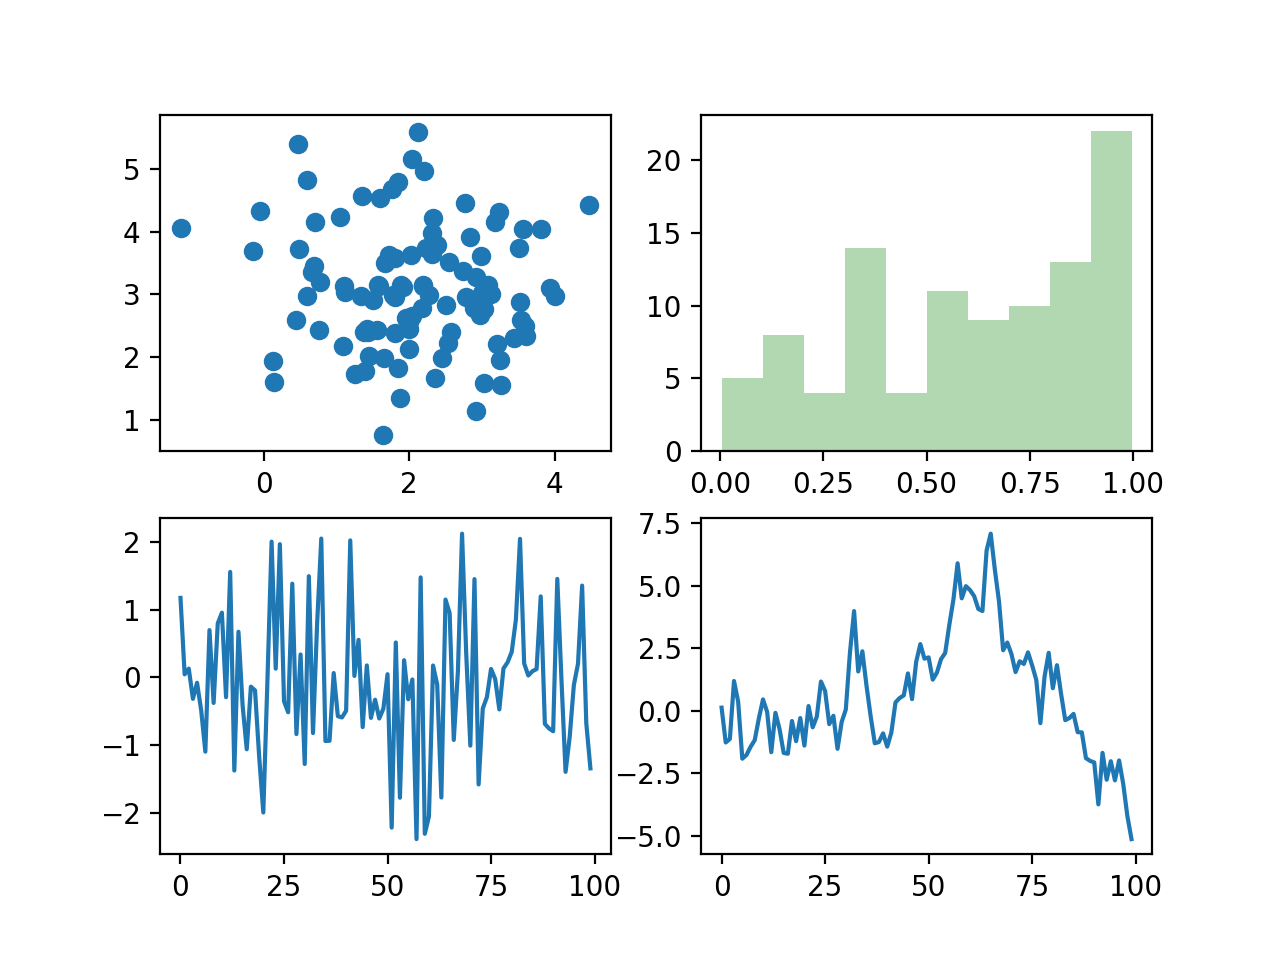

In [36]:
fig = plt.figure()
pt1 = fig.add_subplot(2,2,1)
pt2 = fig.add_subplot(2,2,2)
pt3 = fig.add_subplot(2,2,3)
pt4 = fig.add_subplot(2,2,4)
pt1.scatter(np.random.randn(100) + 2, np.random.randn(100) + 3) # two random normal vectors with mean 2 and 3
pt2.hist(np.random.uniform(0,1,100),bins= 10,color= 'g', alpha = 0.3) # min, max, count
pt3.plot(np.random.randn(100))
pt4.plot(np.random.randn(100).cumsum()) # plot a cumulative sequence

* Subplot creation is very common, so simpler method exists for subplot

<IPython.core.display.Javascript object>


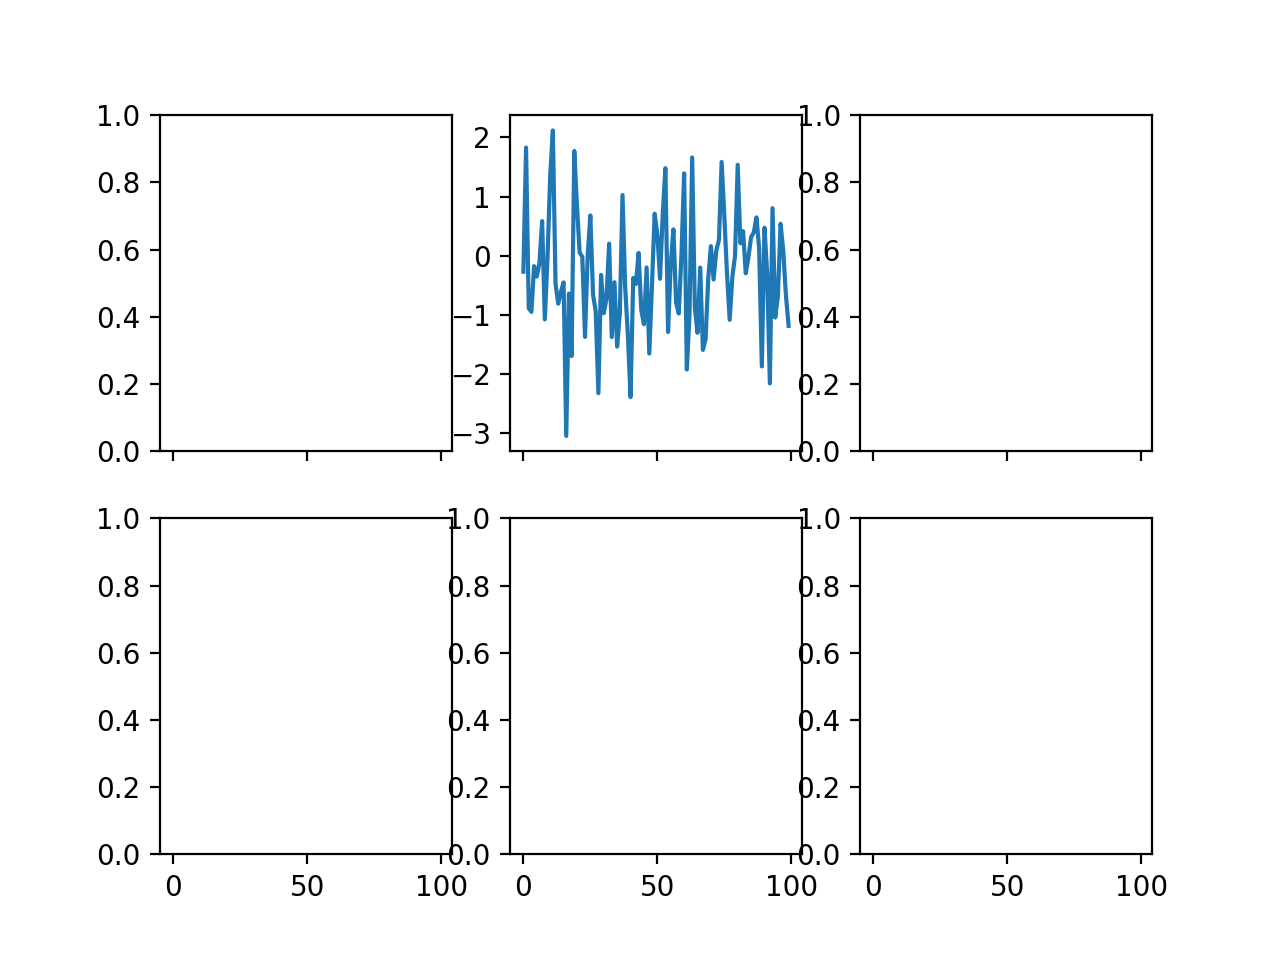

In [47]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex= True, sharey= False) 
# fig makes the whole figure accessible, axes is a numpy array and can be accessed to
# create figs.
# sharex and sharey arguments ensure ticks on x and y axes are same for all subplots
axes[0,1].plot(np.random.randn(100))

In [43]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ee316a0>,
        list([<matplotlib.lines.Line2D object at 0x11fb3a710>]),
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fb035c0>]], dtype=object)

In [48]:
plt.close('all')

#### Adjusting the spacing around subplots

* By Default the subplots created on a figure have padding between them and around them, so if the subplot image size
is changed programatically or interactively, the plots adjust 
* These spacings can be controlled 
* The axes in the fugures below still overlap, more to come on controlling that

<IPython.core.display.Javascript object>


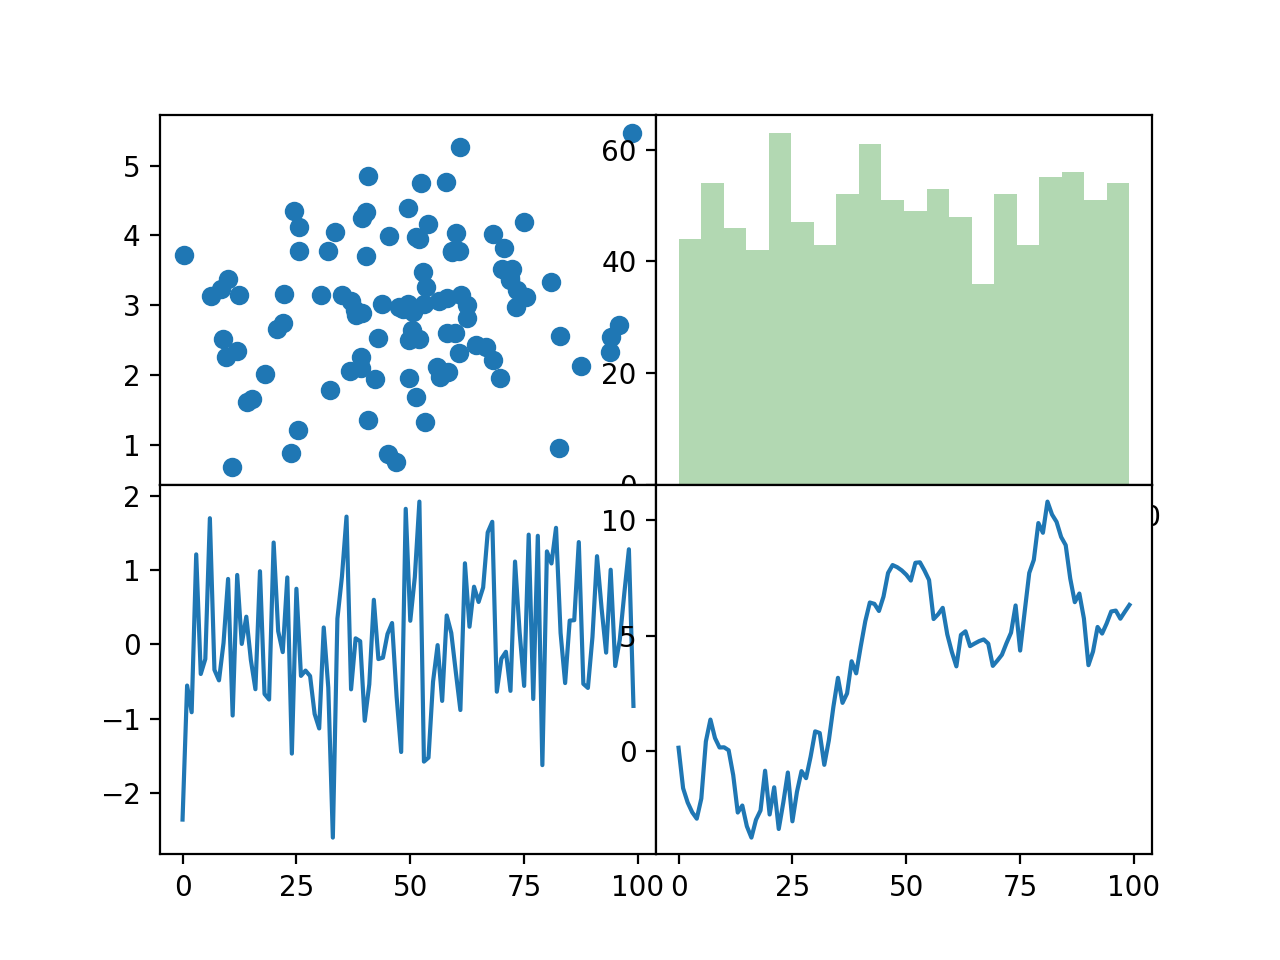

In [55]:
fig, axes = plt.subplots(nrows = 2, ncols = 2,sharex = False)
axes[0,0].scatter(np.random.randn(100) + 2, np.random.randn(100) + 3) # two random normal vectors with mean 2 and 3
axes[0,1].hist(np.random.uniform(0,1,1000),bins= 20,color= 'g', alpha = 0.3) # min, max, count
axes[1,0].plot(np.random.randn(100))
axes[1,1].plot(np.random.randn(100).cumsum()) # plot a cumulative sequence
plt.subplots_adjust(left = None, right = None, bottom = None, top = None , wspace = 0, hspace = 0 )

<IPython.core.display.Javascript object>


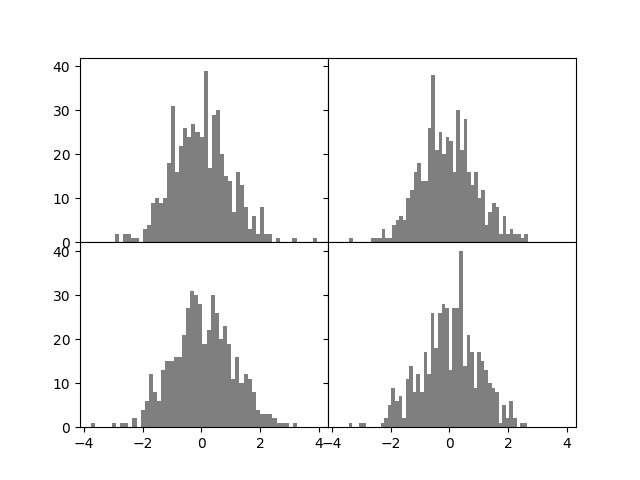

In [24]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

* plot method in pyplot has option of spcifuing linestyle, color and markers. Data points are normally not visible in line plots, markers help identify the data points  
* the type of interpolation used to connect the points can be specified using 'draw-style' 

ax.plot(x, y, 'g--') # shortcut to specify color and linestyle

ax.plot(x, y, linestyle='--', color='g')

<IPython.core.display.Javascript object>


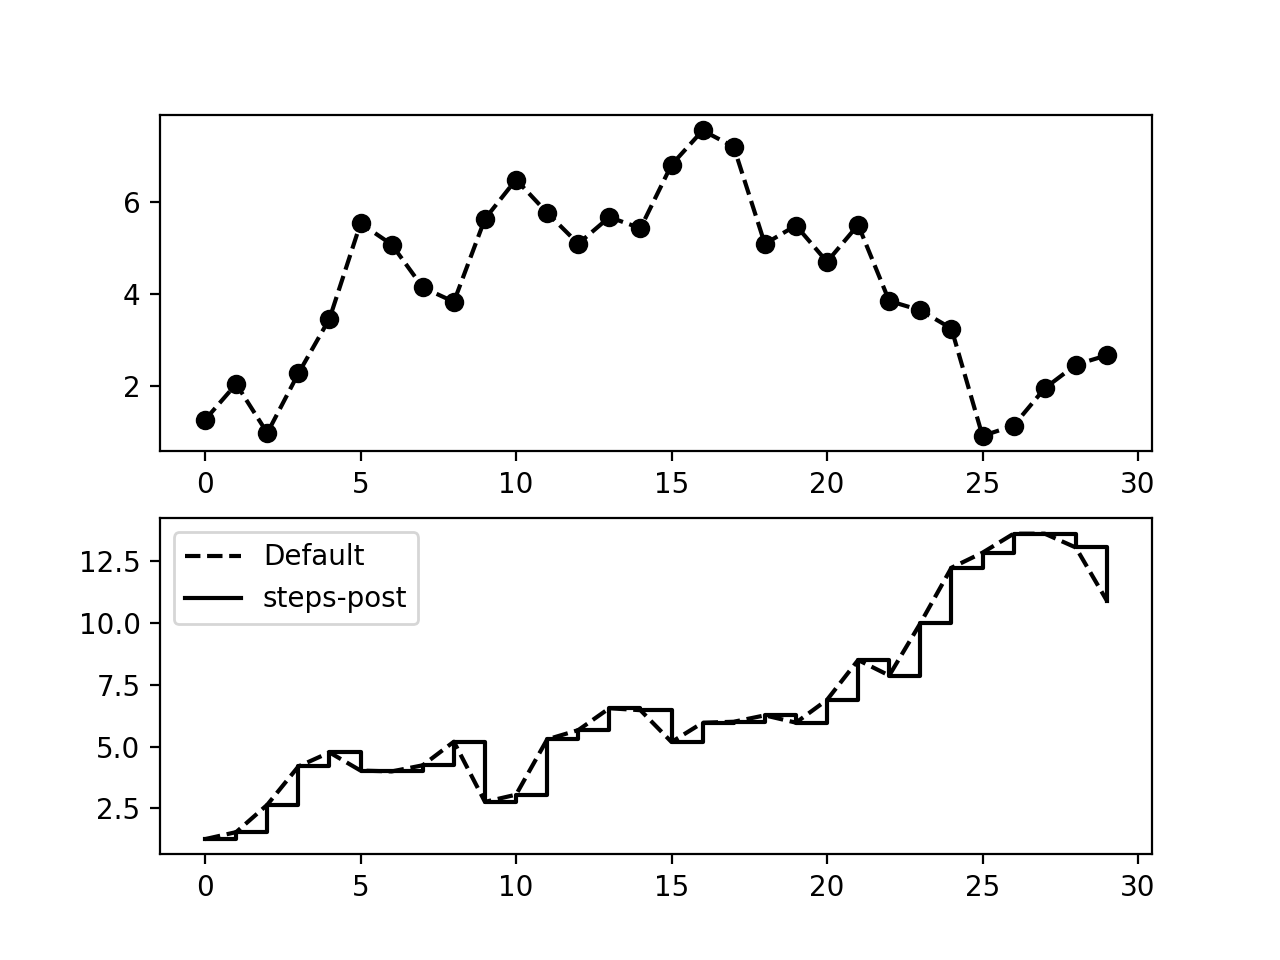

In [80]:
fig, axes = plt.subplots(ncols= 1, nrows =2)
axes[0].plot(randn(30).cumsum(), 'ko--')

plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [81]:
data = np.random.randn(30).cumsum()
axes[1].plot(data, 'k--', label='Default')
axes[1].plot(data, 'k-', drawstyle='steps-post', label='steps-post') # another layer added to the plot, use of label
plt.legend(loc='best') # plt.legend needs to be called separately

In [83]:
plt.plot?

plt.close('all')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

* The AxesSubplot object has set get methods to set attributes like 'title','xlabel', 'xticklabels', 'xticks', 
 we can define properties and assign them to set method using dic unpacking

<IPython.core.display.Javascript object>


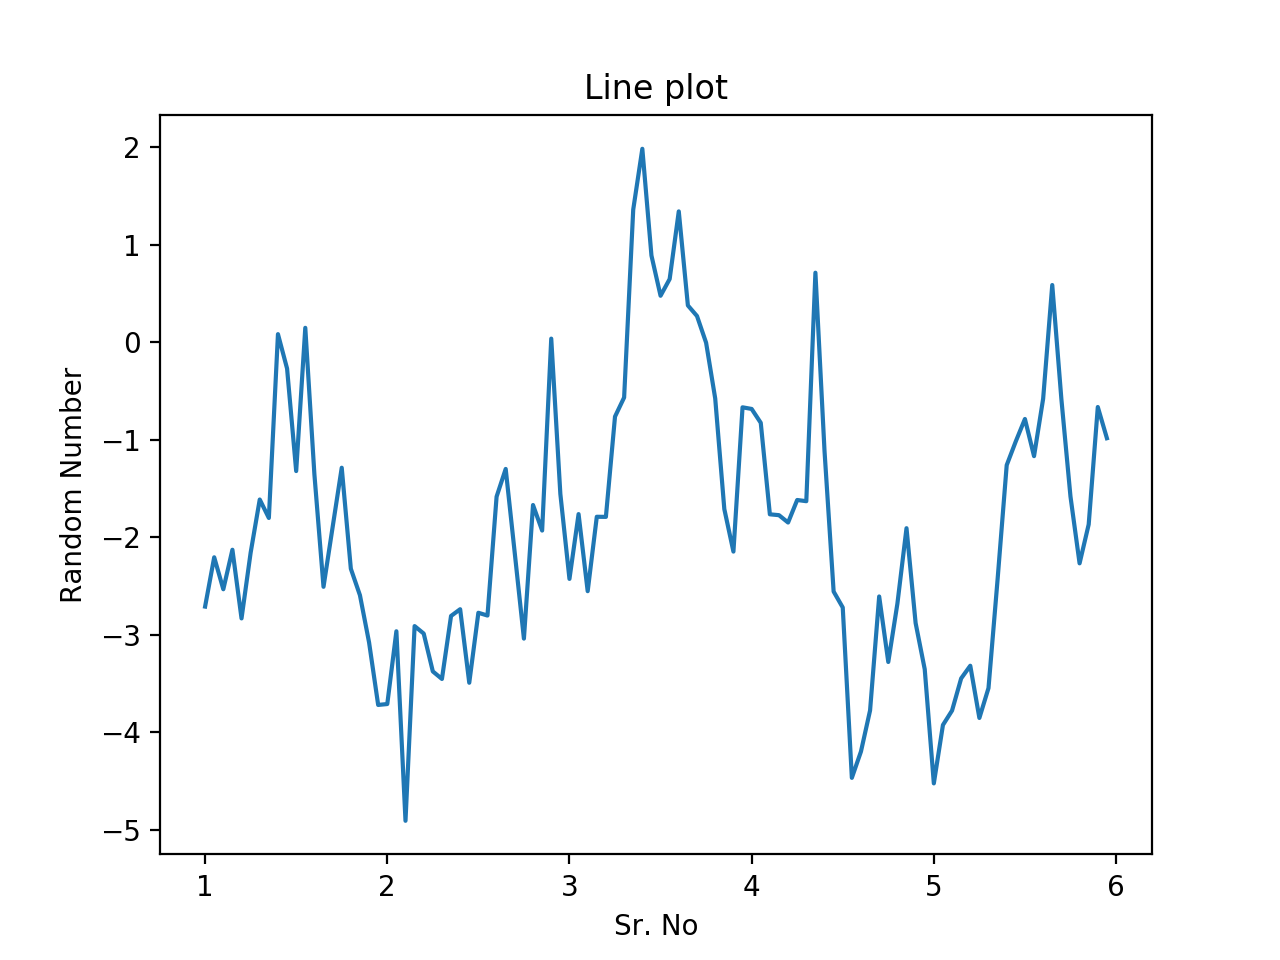

<class 'matplotlib.axes._subplots.AxesSubplot'>


In [107]:
pt = plt.figure()
ax = pt.add_subplot(1,1,1)
ax.plot(np.random.randn(100).cumsum())
props = {'title': 'Line plot',
        'xlabel': 'Sr. No',
         'ylabel' : 'Random Number',
        'xticks': [0,20,40,60,80,100],
        'xticklabels': [1,2,3,4,5,6]}
ax.set(**props)
print(type(ax))


* To get finer control use direct methods-ax.set_xticklabels(), set_xticks(), set_title, set_xlabel

In [108]:
# get methods give the current setting
ax.get_xlim()

(-4.9500000000000002, 103.95)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [ ]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [ ]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Adding legends  
* When drawing multile plots on a subplot, pass 'label', and later simply call legend attribute 
* to skip legend for a plot, dont pass a label or pass '_nolegend_'

<IPython.core.display.Javascript object>


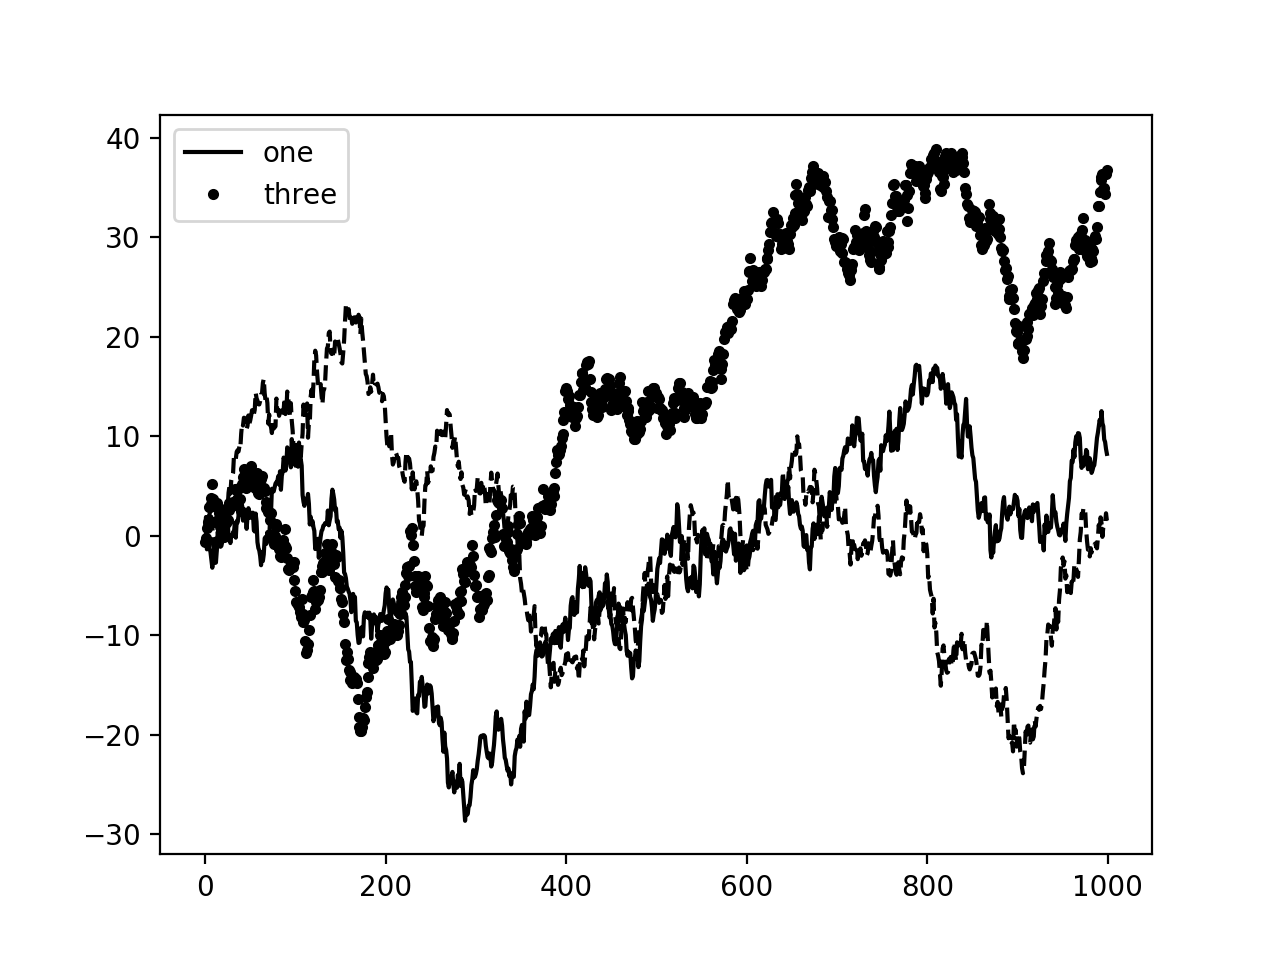

In [113]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='_nolegend_')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [114]:
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [ ]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [ ]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

plt.savefig('figpath.svg')

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib Configuration

plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

## Plotting with pandas and seaborn

### Line Plots

In [25]:
plt.close('all')

<IPython.core.display.Javascript object>


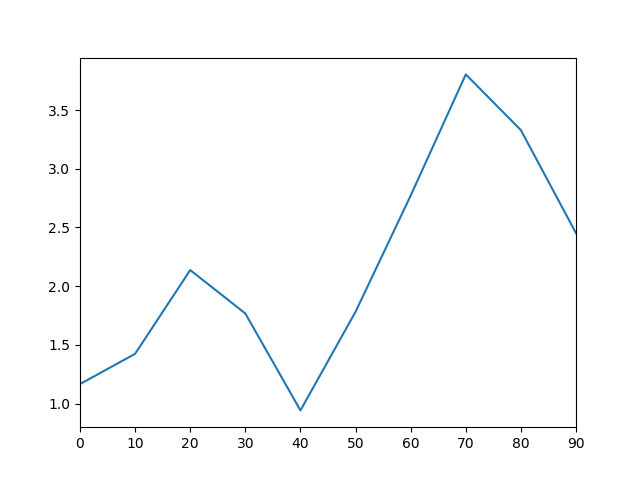

In [26]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<IPython.core.display.Javascript object>


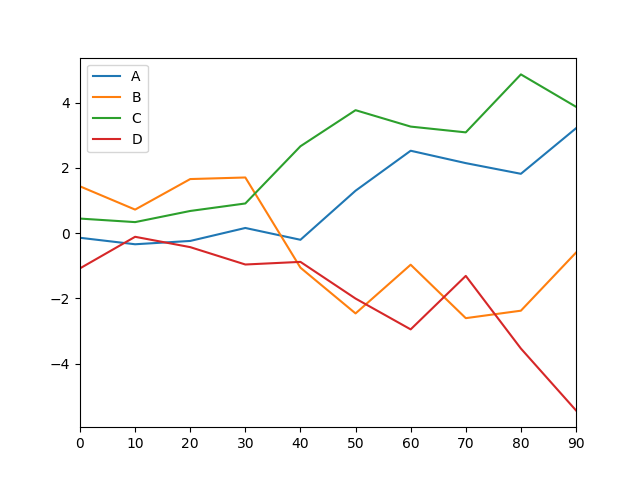

In [27]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

<IPython.core.display.Javascript object>


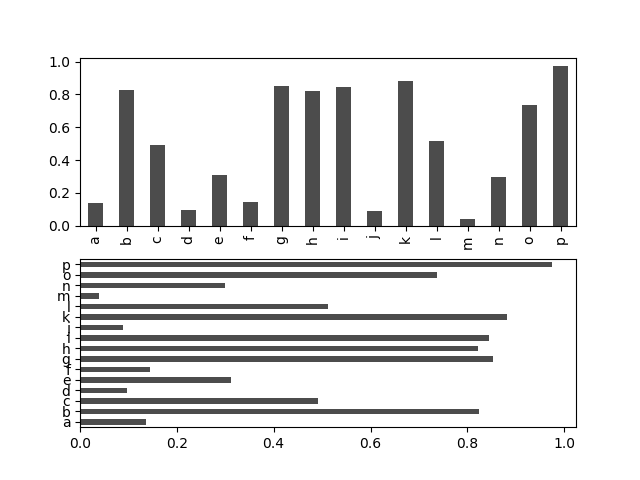

In [28]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [29]:
np.random.seed(12348)

<IPython.core.display.Javascript object>


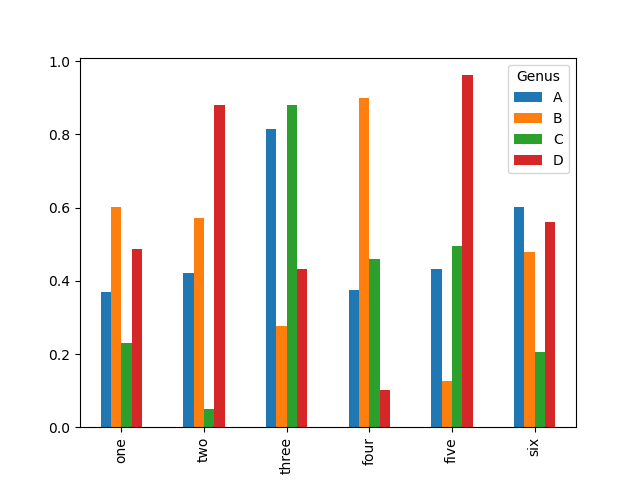

In [30]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

<IPython.core.display.Javascript object>


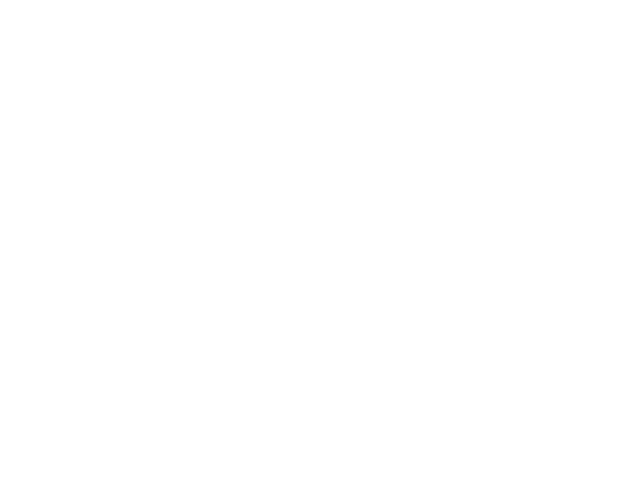

<IPython.core.display.Javascript object>


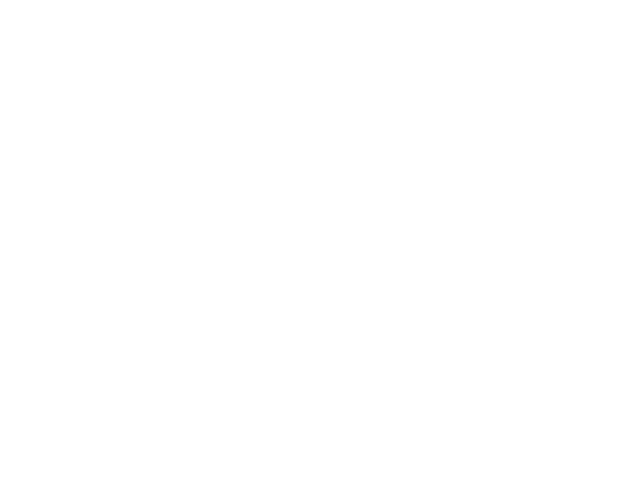

In [31]:
plt.figure()

<IPython.core.display.Javascript object>


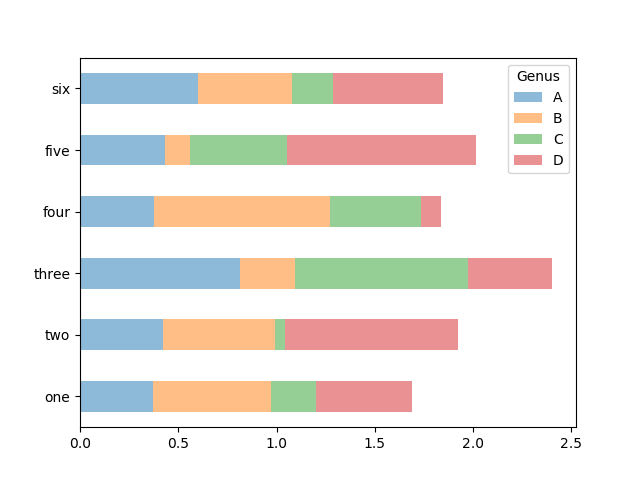

In [32]:
df.plot.barh(stacked=True, alpha=0.5)

In [33]:
plt.close('all')

In [ ]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

In [ ]:
plt.close('all')

In [ ]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [ ]:
plt.close('all')

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [ ]:
plt.close('all')

In [ ]:
sns.set(style="whitegrid")

### Histograms and Density Plots

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'].plot.hist(bins=50)

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'].plot.density()

In [ ]:
plt.figure()

In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [ ]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

In [ ]:
plt.figure()

In [ ]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In [ ]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

In [ ]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion